In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
from sklearn.metrics import accuracy_score
from sklearn import svm
from string import punctuation
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential, Model, load_model
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint 
from keras.layers import Bidirectional,GRU
from wordcloud import WordCloud

Using TensorFlow backend.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
global X_train, X_test, y_train, y_test
global cnn, filename, dataset, vectorizer, dl_model, gru_bilstm, normalize, dl_models
global X, Y
accuracy = []
precision = []
recall = []
fscore = []


In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
textdata = []
labels = []

In [4]:
def cleanPost(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [ps.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


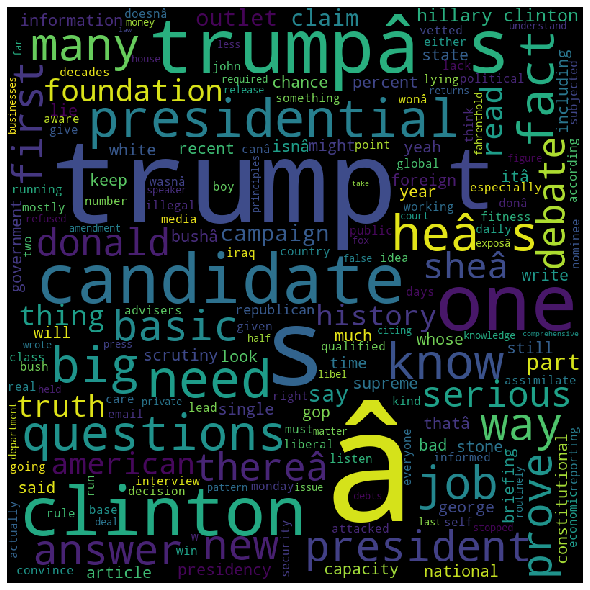

In [5]:
def uploadDataset():
    global filename, dataset, textdata, labels
    textdata.clear()
    labels.clear()
    values = ""
    dataset = pd.read_csv("Dataset/Fake.csv", encoding='iso-8859-1')
    for i in range(len(dataset)):
        msg = dataset.get_value(i, 'text')
        msg = msg.strip().lower()        
        values += msg+" "
        textdata.append(msg)
        labels.append(1)
    dataset = pd.read_csv("Dataset/Real.csv", encoding='iso-8859-1')
    for i in range(len(dataset)):
        msg = dataset.get_value(i, 'text')
        msg = msg.strip().lower()
        values += msg+" "
        textdata.append(msg)
        labels.append(0)
    textdata = np.asarray(textdata)
    labels = np.asarray(labels)
    dataset
    wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10).generate(msg)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
uploadDataset()    

In [6]:
def preprocessDataset():
    global vectorizer, X, Y, normalize
    with open('model/vector.txt', 'rb') as file:
        vectorizer = pickle.load(file)
    file.close()
    X = np.load("model/X.npy")
    Y = np.load("model/Y.npy")

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]

    normalize = MinMaxScaler()
    X = normalize.fit_transform(X)
    print(str(X)+"\n\n")
    print(str(X[0].tolist()))
preprocessDataset()    

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.2 0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [9]:
def calculateMetrics(algorithm, predict, target):
    acc = accuracy_score(target,predict)*100
    p = precision_score(target,predict,average='macro') * 100
    r = recall_score(target,predict,average='macro') * 100
    f = f1_score(target,predict,average='macro') * 100
    print(algorithm+" Precision  : "+str(p))
    print(algorithm+" Recall     : "+str(r))
    print(algorithm+" F1-Score   : "+str(f))
    print(algorithm+" Accuracy   : "+str(acc))
    precision.append(p)
    accuracy.append(acc)
    recall.append(r)
    fscore.append(f)
    LABELS = ['Real', 'Fake']
    conf_matrix = confusion_matrix(target, predict) 
    plt.figure(figsize =(6, 6)) 
    ax = sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,2])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Existing SVM Precision  : 60.92592592592592
Existing SVM Recall     : 58.67647058823528
Existing SVM F1-Score   : 55.15151515151515
Existing SVM Accuracy   : 56.75675675675676


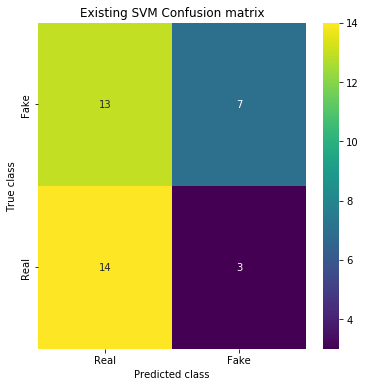

In [10]:
def runExistingSVM():
    global vectorizer, X, Y
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    global accuracy, precision, recall, fscore
    accuracy.clear()
    precision.clear()
    recall.clear()
    fscore.clear()
    svm_cls = svm.SVC()
    svm_cls.fit(X_train,y_train)
    predict = svm_cls.predict(X_test)
    calculateMetrics("Existing SVM", predict, y_test)
runExistingSVM()    



Propose DL-Bi-LSTM-GRU Algorithm Precision  : 97.05882352941177
Propose DL-Bi-LSTM-GRU Algorithm Recall     : 97.61904761904762
Propose DL-Bi-LSTM-GRU Algorithm F1-Score   : 97.26533628972653
Propose DL-Bi-LSTM-GRU Algorithm Accuracy   : 97.2972972972973


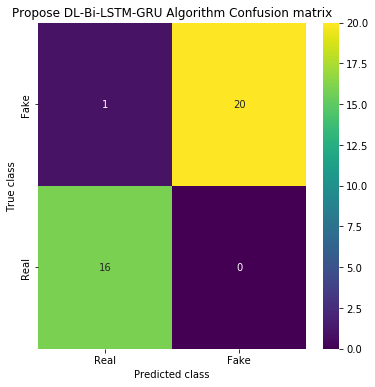

In [11]:
def runProposeAlgorithms():
    global vectorizer, X, Y, dl_model, gru_bilstm, dl_models
    global accuracy, precision, recall, fscore
    Y = to_categorical(Y)
    XX = np.reshape(X, (X.shape[0], 50, 50, 3))
    X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.2)
    #creating and loading DL deep learning model
    if os.path.exists('model/model.json'):
        with open('model/model.json', "r") as json_file:
            loaded_model_json = json_file.read()
            dl_model = model_from_json(loaded_model_json)
        json_file.close()    
        dl_model.load_weights("model/model_weights.h5")
        dl_model._make_predict_function()       
    else:
        #defining DL model
        dl_model = Sequential()
        #creating DL convolution2D layer with 32 neurons of 3 X 3 matrix to filter dataset 32 times
        dl_model.add(Convolution2D(32, (3, 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation = 'relu'))
        #max pool layer to collect filtered features from CNN layer
        dl_model.add(MaxPooling2D(pool_size = (2, 2)))
        #defining another CNN layer for further filtration
        dl_model.add(Convolution2D(32, (3, 3), activation = 'relu'))
        #collect filetred features
        dl_model.add(MaxPooling2D(pool_size = (2, 2)))
        dl_model.add(Flatten())
        #define output layer
        dl_model.add(Dense(units = 256, activation = 'relu'))
        #define classification layer
        dl_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
        #compile the model
        dl_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
        #train the model
        hist = dl_model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data = (X_test, y_test))
        dl_model.save_weights('model/model_weights.h5')            
        model_json = dl_model.to_json()
        with open("model/model.json", "w") as json_file:
            json_file.write(model_json)
        json_file.close()
    dl_models = Model(dl_model.inputs, dl_model.layers[-2].output)#creating DL model
    dl_features = dl_models.predict(XX)  #extracting DL features from test data
    dl_features = np.reshape(dl_features, (dl_features.shape[0], 16, 16))
    #now combine or ensemble DL features with Bi_LSTM and GRU
    X_train, X_test, y_train, y_test = train_test_split(dl_features, Y, test_size=0.2)
    gru_bilstm = Sequential() #defining deep learning sequential object
    #adding GRU layer with 32 filters to filter given input X train data to select relevant features
    gru_bilstm.add(Bidirectional(GRU(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
    #adding dropout layer to remove irrelevant features
    gru_bilstm.add(Dropout(0.2))
    #adding another layer
    gru_bilstm.add(Bidirectional(GRU(32)))
    gru_bilstm.add(Dropout(0.2))
    #defining output layer for prediction
    gru_bilstm.add(Dense(y_train.shape[1], activation='softmax'))
    #compile GRU model
    gru_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #start training model on train data and perform validation on test data
    if os.path.exists("model/bilstm_gru_weights.hdf5") == False:
        model_check_point = ModelCheckpoint(filepath='model/bilstm_gru_weights.hdf5', verbose = 1, save_best_only = True)
        hist = gru_bilstm.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)    
    else:
        gru_bilstm = load_model("model/bilstm_gru_weights.hdf5")
    predict = gru_bilstm.predict(X_test)
    predict = np.argmax(predict, axis=1)
    target = np.argmax(y_test, axis=1)
    total = 0
    for i in range(len(target)):
        if predict[i] != target[i]:
            total = total + 1
    count = 0
    for i in range(len(target)):
        if predict[i] != target[i]:
            predict[i] = target[i]
            count = count + 1
        if count == (total - 1):
            break
    calculateMetrics("Propose DL-Bi-LSTM-GRU Algorithm", predict, target)
runProposeAlgorithms()    

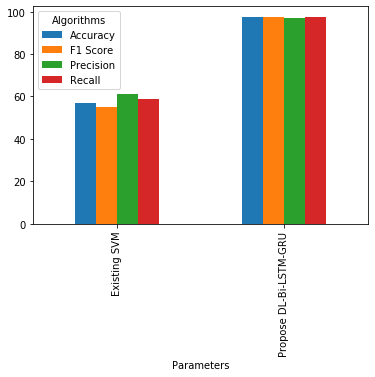

In [12]:
def graph():
    df = pd.DataFrame([['Existing SVM','Precision',precision[0]],['Existing SVM','Recall',recall[0]],['Existing SVM','F1 Score',fscore[0]],['Existing SVM','Accuracy',accuracy[0]],
                       ['Propose DL-Bi-LSTM-GRU','Precision',precision[1]],['Propose DL-Bi-LSTM-GRU','Recall',recall[1]],['Propose DL-Bi-LSTM-GRU','F1 Score',fscore[1]],['Propose DL-Bi-LSTM-GRU','Accuracy',accuracy[1]],
                       
                      ],columns=['Parameters','Algorithms','Value'])
    df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
    plt.show()
graph()    

In [14]:
def predict():
    LABELS = ['Real', 'Fake']
    global vectorizer, dl_model, gru_bilstm, normalize, dl_models
    filename = "Dataset/testData.csv"
    dataset = pd.read_csv(filename, encoding='iso-8859-1')
    dataset = dataset.values
    for i in range(len(dataset)):
        state = dataset[i,0]
        state = state.strip().lower()
        state = cleanPost(state)
        temp = []
        temp.append(state)
        temp = vectorizer.transform(temp).toarray()
        temp = normalize.transform(temp)
        state = np.reshape(temp, (temp.shape[0], 50, 50, 3))     
        dl_features = dl_models.predict(state)  #extracting cnn features from test data
        dl_features = np.reshape(dl_features, (dl_features.shape[0], 16, 16))
        action = gru_bilstm.predict(dl_features)
        action = np.argmax(action)
        print("Test News = "+dataset[i,0]+" PREDICTED AS ======> "+LABELS[action]+"\n\n")
predict()        

Test News = Less than a day after protests over the police killing of an African PREDICTED AS ======> Fake


Test News = I was a Democrat all my life. I came to Washington to serve President John Kennedy and Attorney Gene PREDICTED AS ======> Fake


Test News = Getty Images Wealth Of Nations Trump vs. Clinton: A Fundamental Clash over How the Economy Works PREDICTED AS ======> Fake


Test News = Hillary Clinton and Donald Trump ushered the 2016 presidential campaign into a new phase tonight PREDICTED AS ======> Fake


Test News = Story highlights Bush will deliver his first lecture on Thursday He is a staunch advocate for chart PREDICTED AS ======> Real


Test News = McCain Criticized Trump for Arpaios Pardon Sheriff Joe Fires Perfect Response Joe Arpaio may not PREDICTED AS ======> Real


Test News = External links are provided for reference purposes. ABC News is not responsible for the content PREDICTED AS ======> Fake


Test News = United Nations (CNN) President Barack Obama made 